In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

## Check missing values

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
# There are no missing values

## Check duplicates

In [11]:
df.duplicated().sum()

0

In [13]:
# There are no duplicates

## Check data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
# It checks for null and Dtypes

## Check the number of unique values of each column

In [16]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Check statsitics of data

In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
# Insight
#From the above description, all meansare very close to each other - between 66 and 68.05;
#All standard devaitions are also close - between 14.6 and 15.19;
#While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading minimum is higher =17

## exploring data

In [4]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test preparation course' variable:   ['none' 'completed']


In [5]:
# Define numeric and categoric column
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
categoric_features = df.select_dtypes(include=['object','category']).columns.tolist()

#print columns
print('We have {} numeric features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categoric features : {}'.format(len(categoric_features), categoric_features))

We have 3 numeric features : ['math score', 'reading score', 'writing score']

We have 5 categoric features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for Total Score and Average

In [6]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [7]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [8]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Math: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


In [38]:
# Insights:
# From the above, students' best performance is in reading
# While worst performanve is in math

# Exploring Data (Visualization)

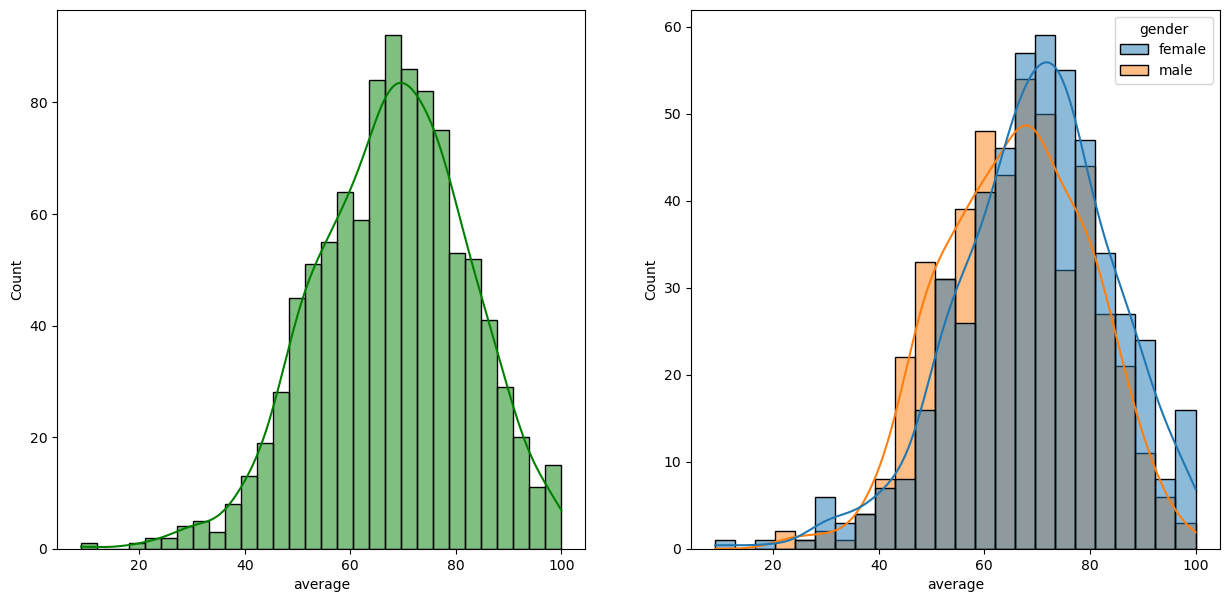

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

In [41]:
# Insights:
# Female students tend to perform better than male students

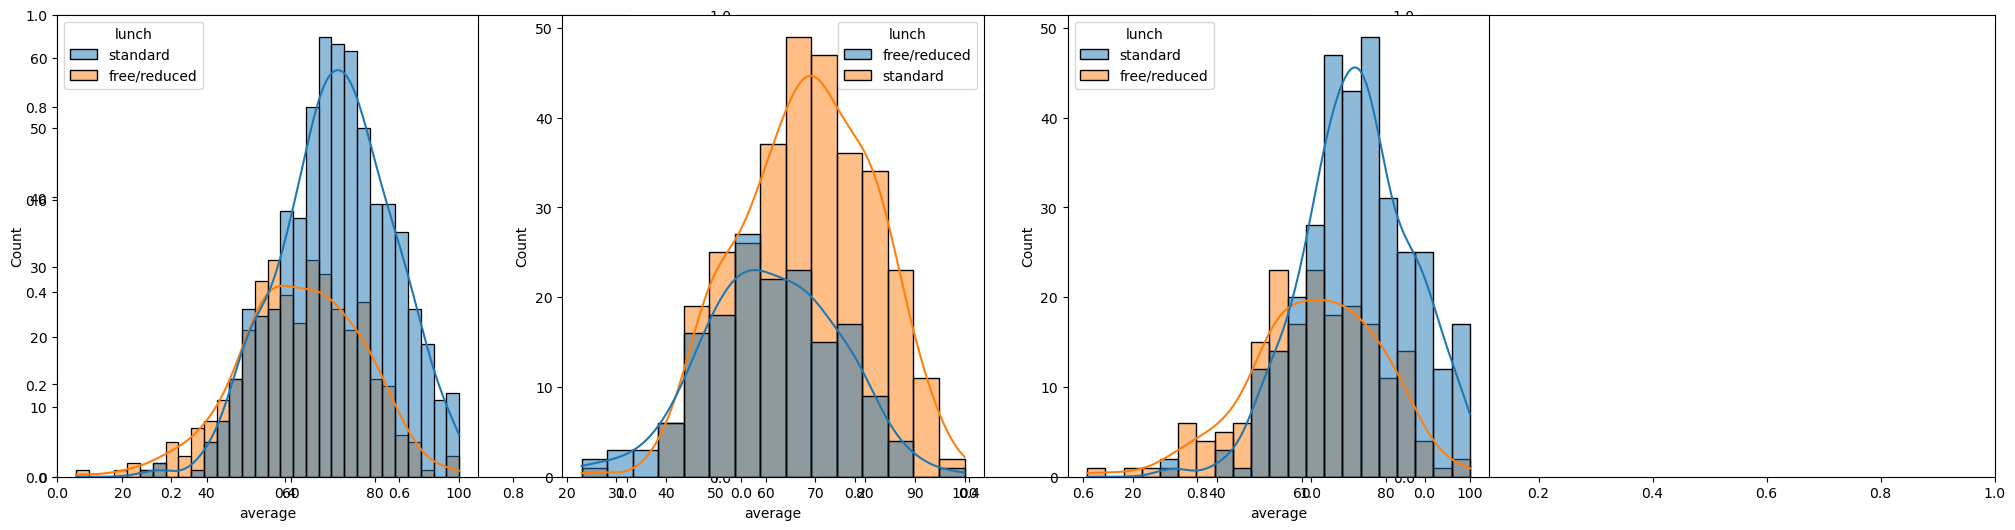

In [46]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.show()

In [43]:
# Insights:
# Standard lunch helps students perform well in exams
#Satandard lunch helps students perform well in exams be it male or female

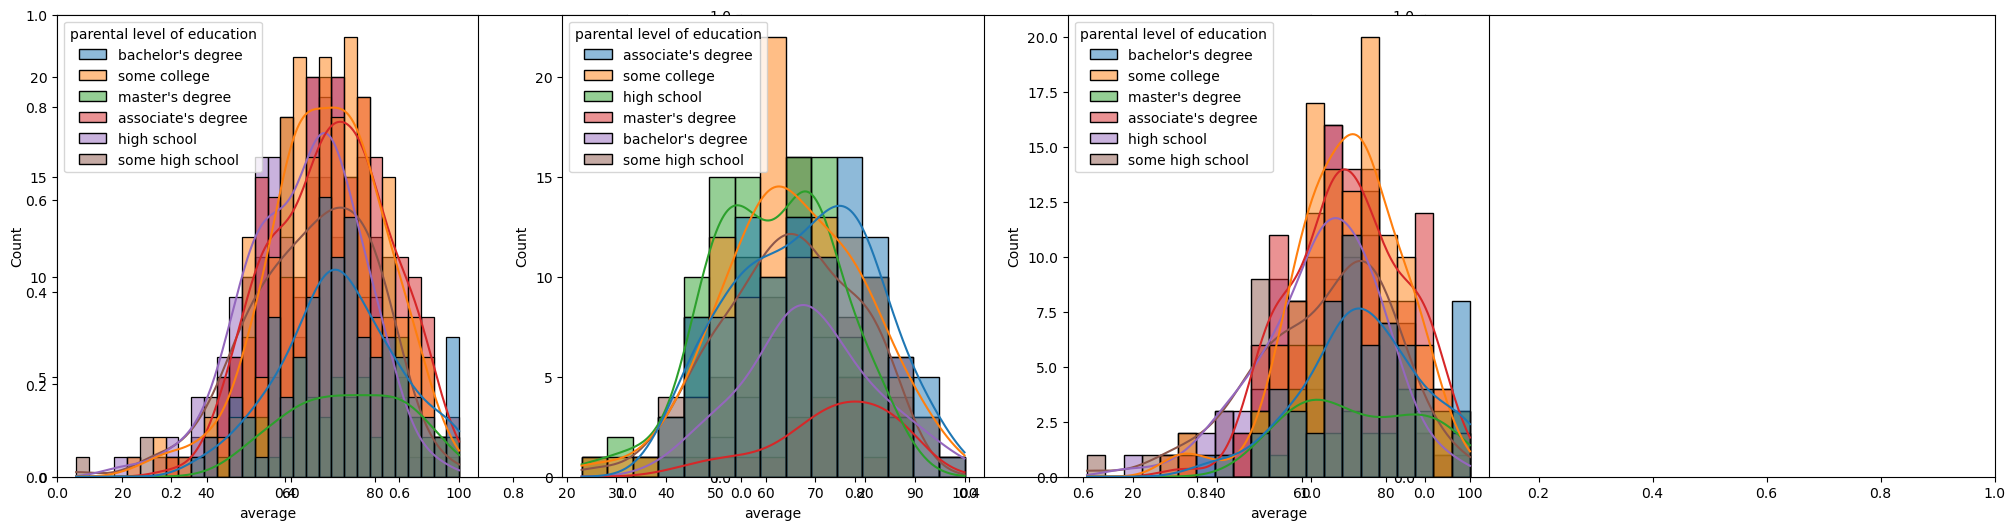

In [48]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

In [49]:
# Insights:
# In general, parent's education don't help students perform well in exam
# 2nd plot shows that parent's whsoe eduscation is associate's degree or master's degree, their male child tend to perform well
#3rd plot, we can see no effectof [arent's education on female students

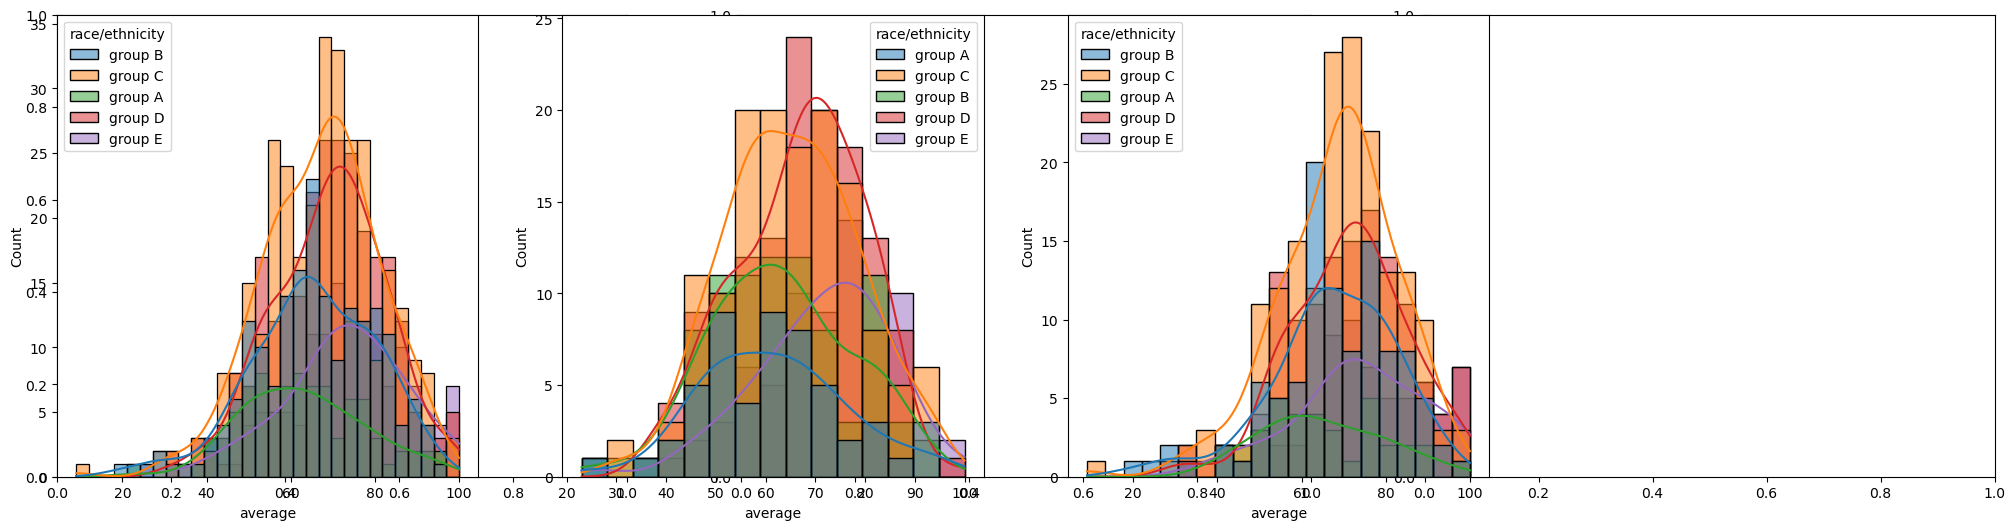

In [50]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show()

In [51]:
# Insights:
# Students of group A and B tend to perfoem poorly in exams
# Students in group A and B tend to perform poorly in exam irrespect of their gender

# Maximum score of students in all three subjects

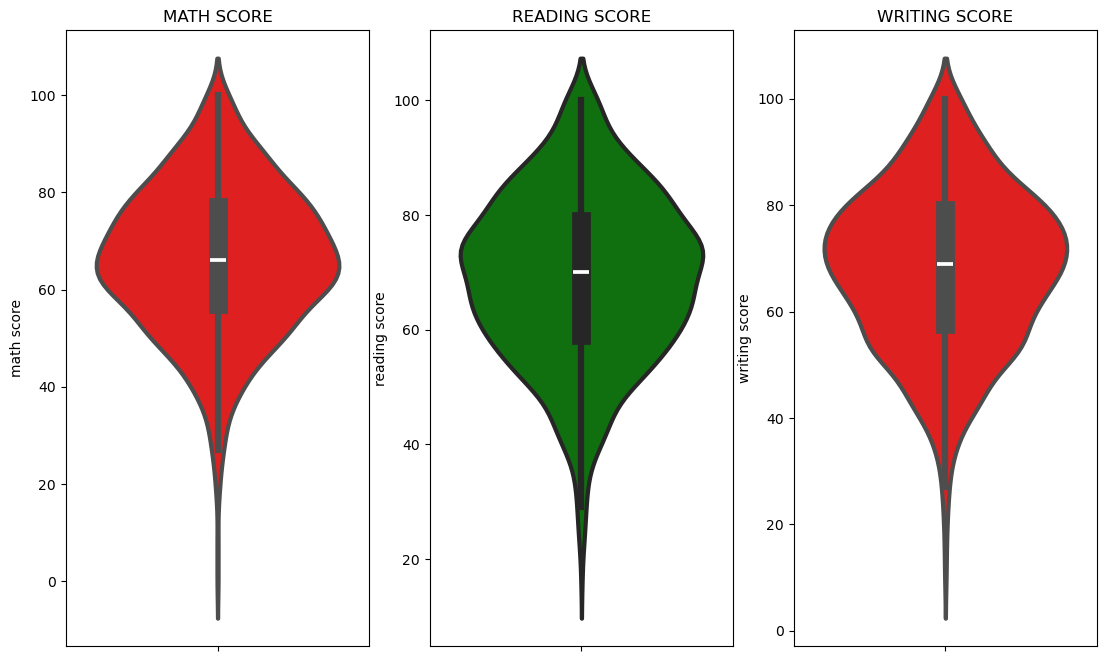

In [53]:
plt.figure(figsize=(18, 8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score',data=df,color='red',linewidth=3)
plt.show()

In [54]:
# Insight:
#  From the above three plots, i is clearly seen that most of the students score in between 60-80 in math 
# whereas in reading and writing, most of them score 50-80

# Multivariate analysis using pieplot

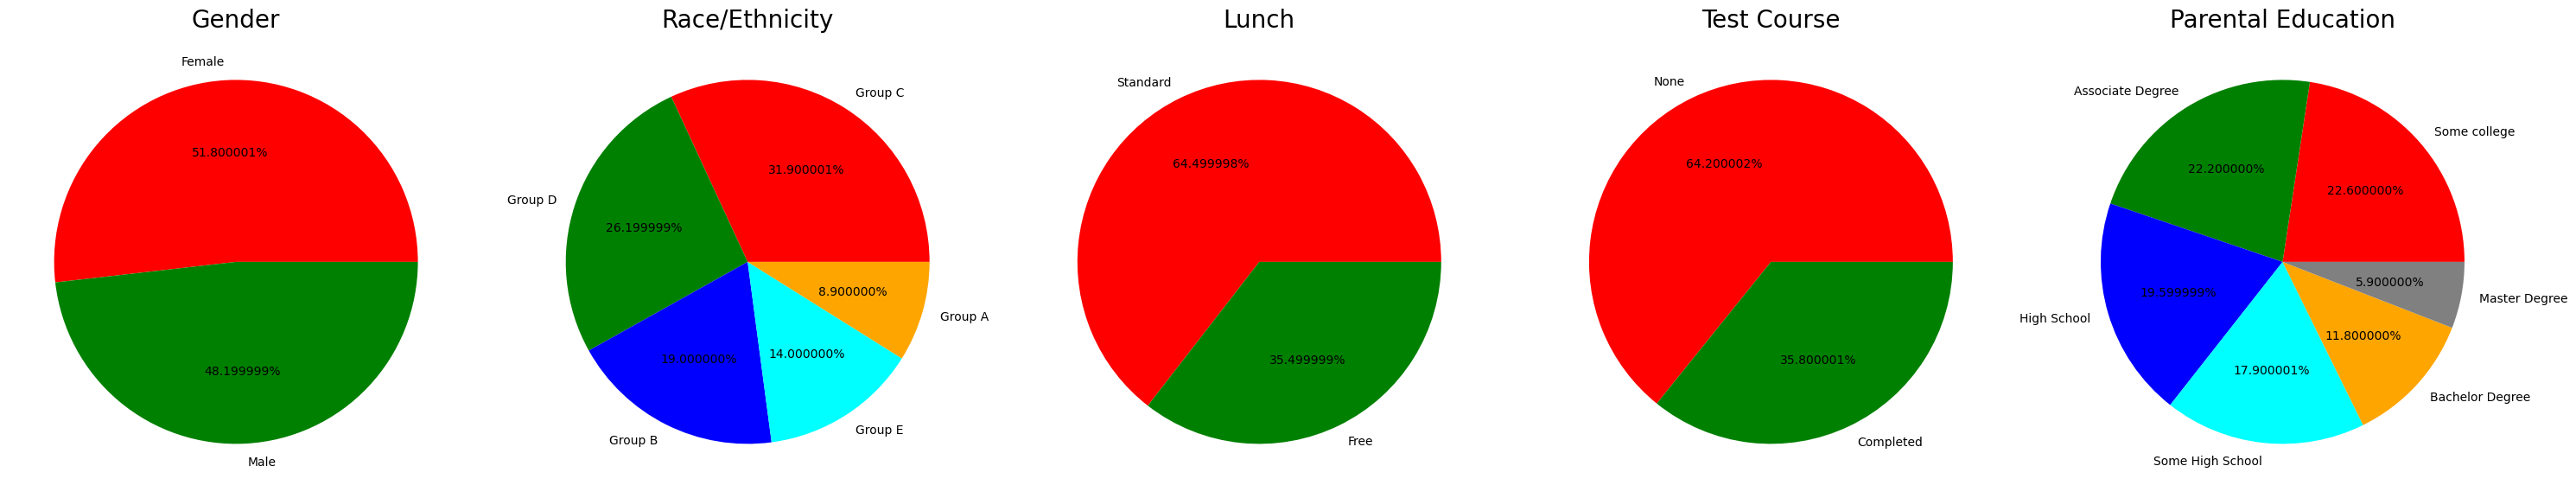

In [9]:
plt.rcParams['figure.figsize']=(30, 12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')   

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels='Some college','Associate Degree','High School','Some High School','Bachelor Degree','Master Degree'
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')    

plt.tight_layout()
plt.grid()

plt.show()

In [62]:
# Insights:
# Number of male and female students are almost equal
# Number of students are greatest in Group C
# Number of students who have standard lunch ina any preparation course is greater
# Number of students who have not enrolled in any test preparation is gretaer
# Number ofstudents whose parental education is "Some College" is greater followed closely by "Associate Degree"

# Featurewise Visualization

In [63]:
# How is distribution of gender?
# Does gender has any impact on students's performace

# Univaraite Analysis (How is gender distribution)

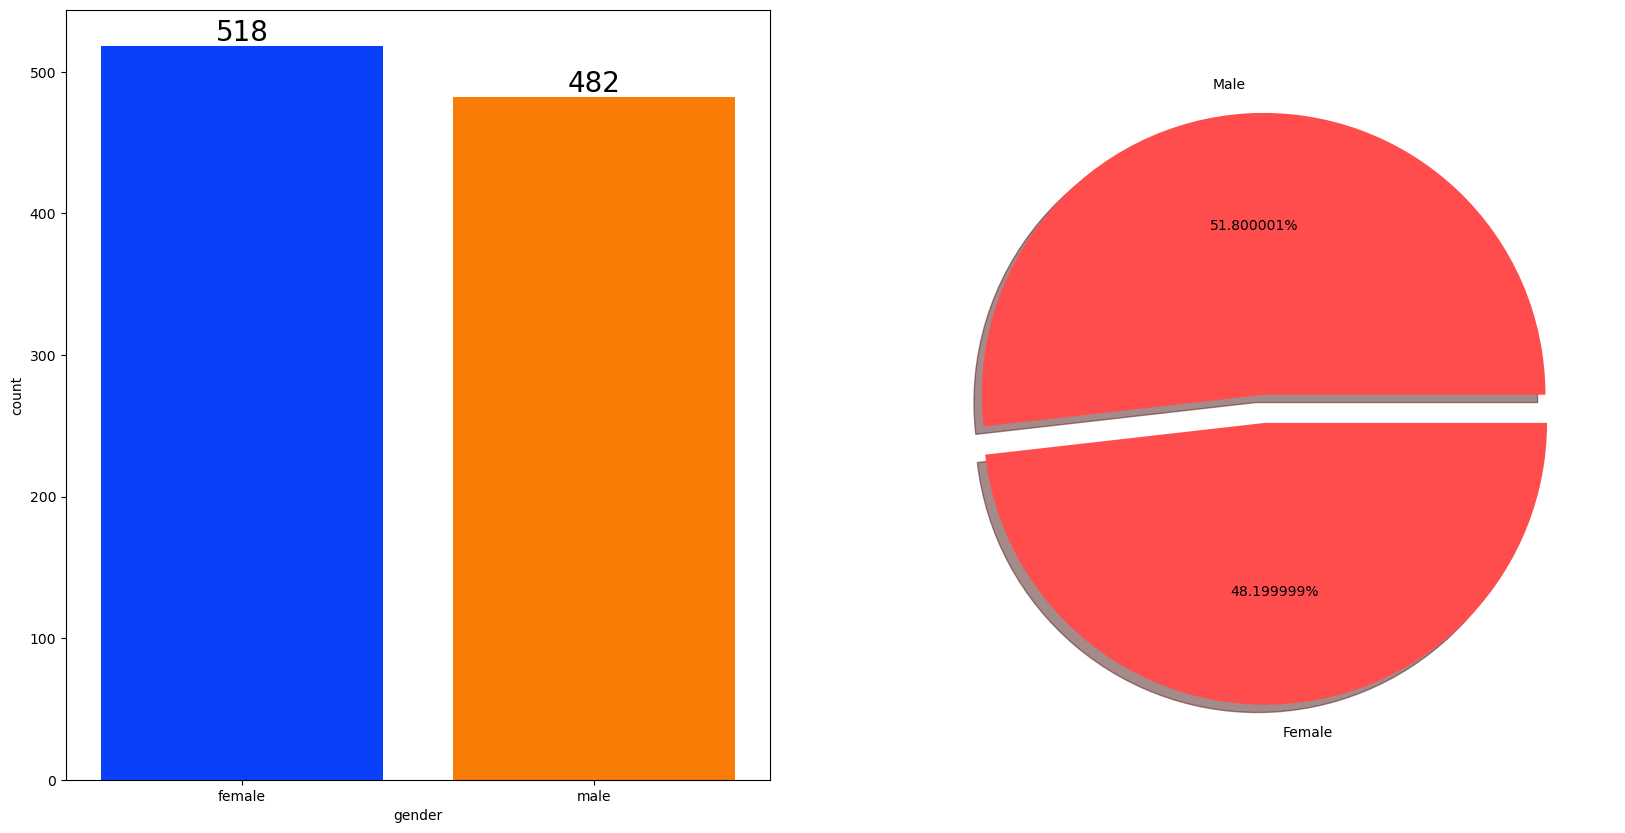

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%2f%%',shadow=True,colors=['#ff4d4d'])
plt.show()

In [15]:
# Insights:
# Gender has balanced data with female students as 518[48%] and male students as 482[52%]

# Bivariate Analysis (Does gender has any impact on students's performance?)

In [33]:
gender_group = df.groupby('gender').count()
gender_group

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


<function matplotlib.pyplot.show(close=None, block=None)>

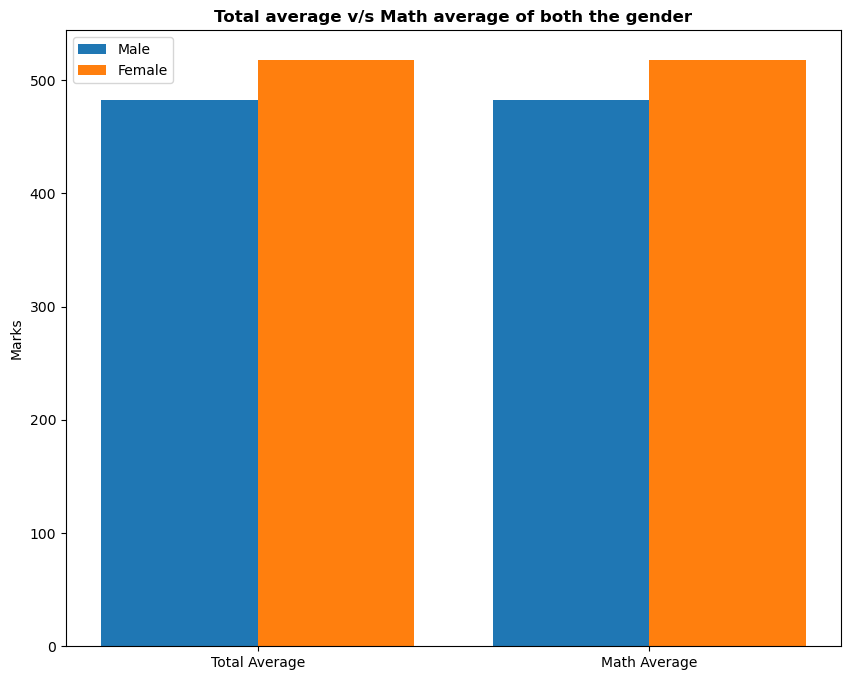

In [34]:
plt.figure(figsize=(10, 8))

x = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(x_axis, x)
plt.ylabel('Marks')
plt.title('Total average v/s Math average of both the gender', fontweight='bold')
plt.legend()
plt.show

In [35]:
# Insights:
# On average, females have better overall score than male 

# Race/Ethnicity

In [36]:
# How is group wise distribution
# Is Race/Ethnicity ahs any impact on students performance

# Univariate Analysis (How is group wise distribution?)

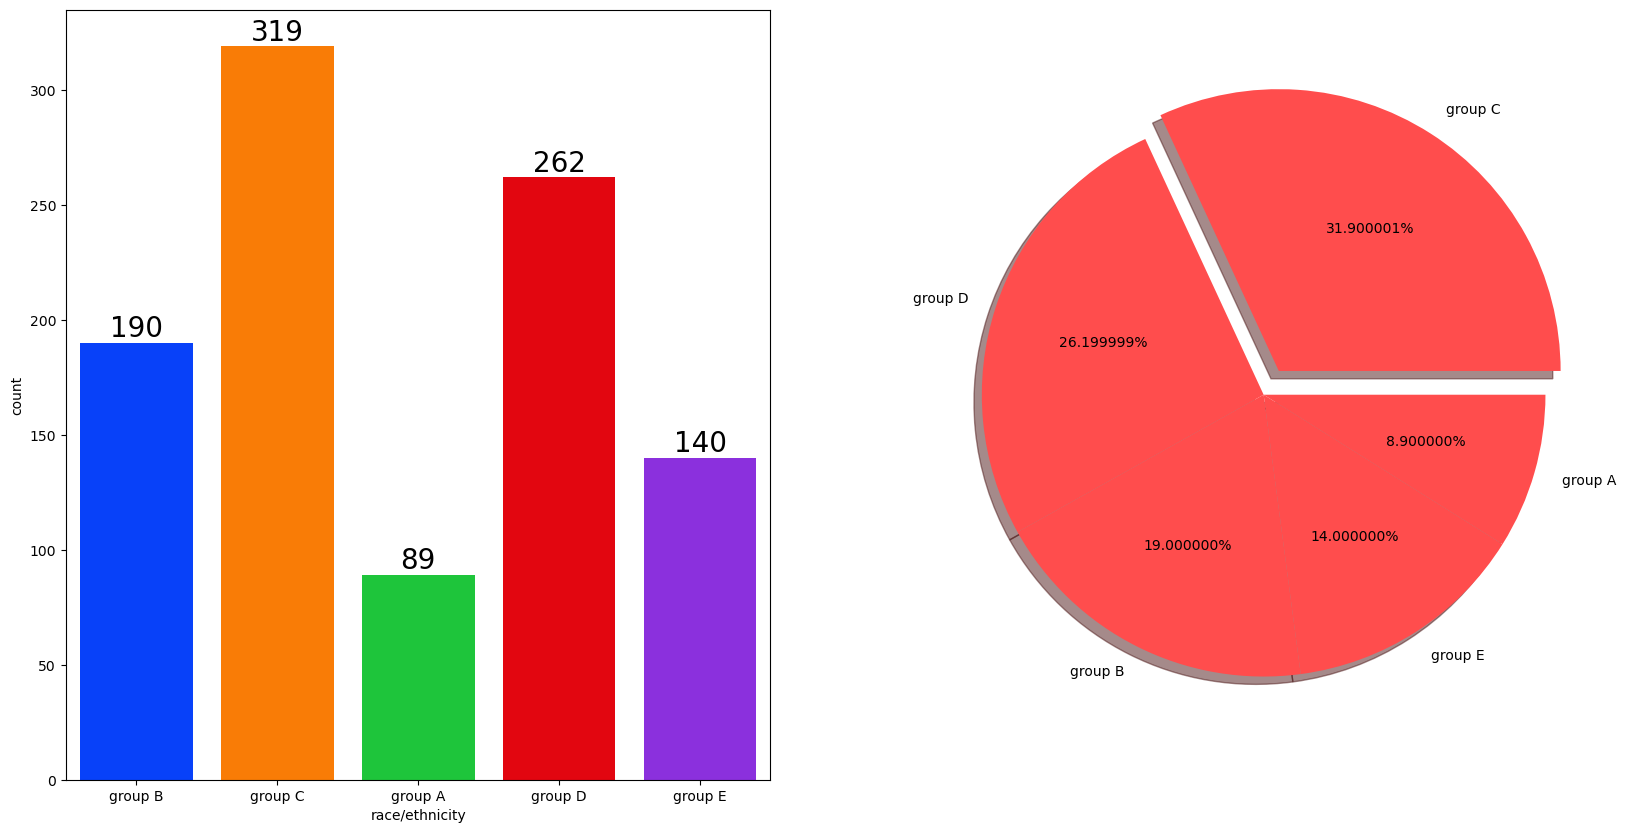

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%2f%%',shadow=True,colors=['#ff4d4d'])
plt.show()

In [39]:
# Insights:
# Most of the students belong to group C/group D
# Lowest number of students belong to gorup A

# Bivariate Analysis (Is Race/Ethnicity has any impact on students' performance?)

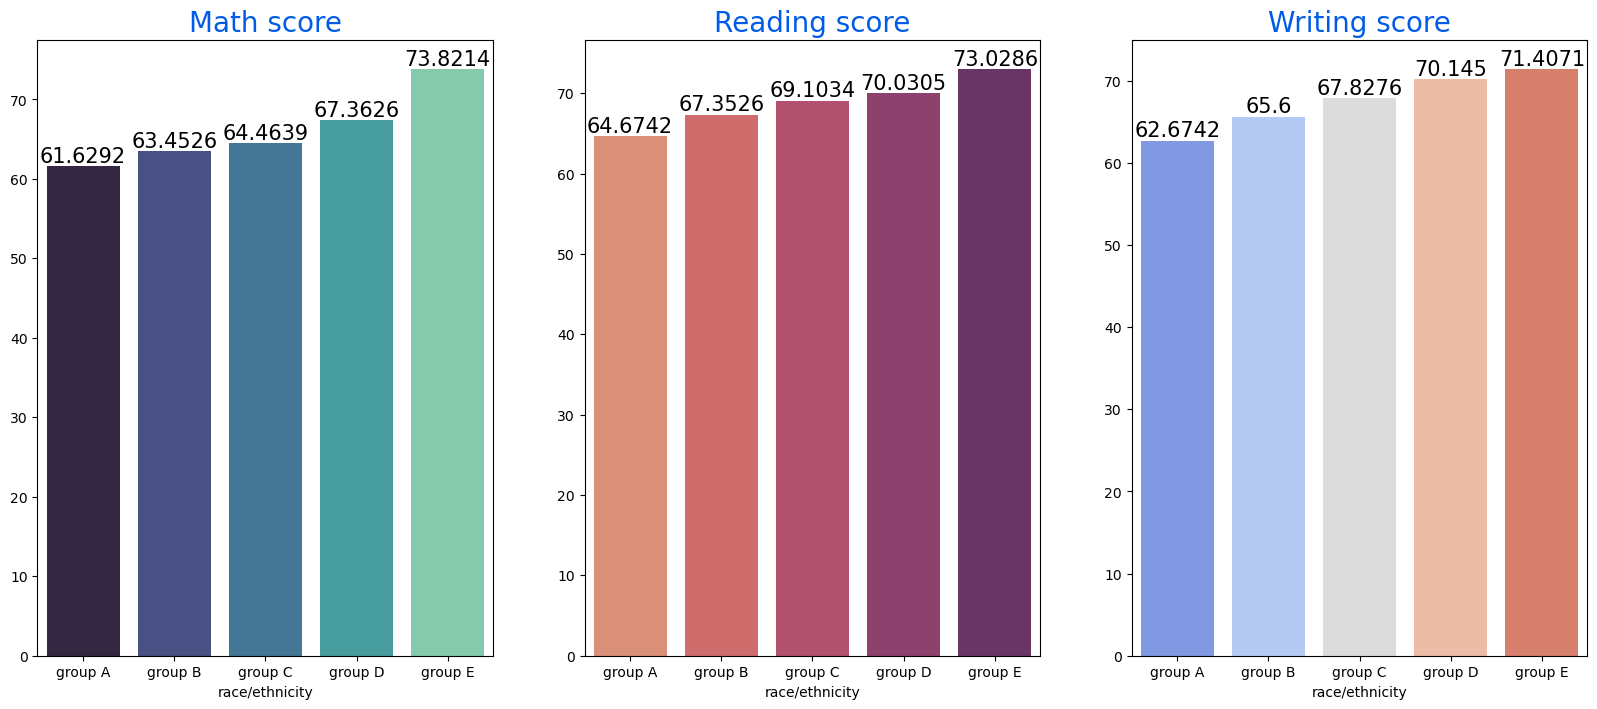

In [46]:
Group_data2 = df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%2f%%',shadow=True,colors=['#ff4d4d'])
plt.show()

In [47]:
# Insights:
# Group E students have scored the highest marks
# Group A students have scord the lowest marks
# Students from a lower Socioeconomic status have a lower avg in all courses

# Parental level of Education

In [48]:
# What is the educational background of students's parent?
# Is parental education has any impact on students's performance?

# Univariate analysis (What is the educational background of students's parent?)

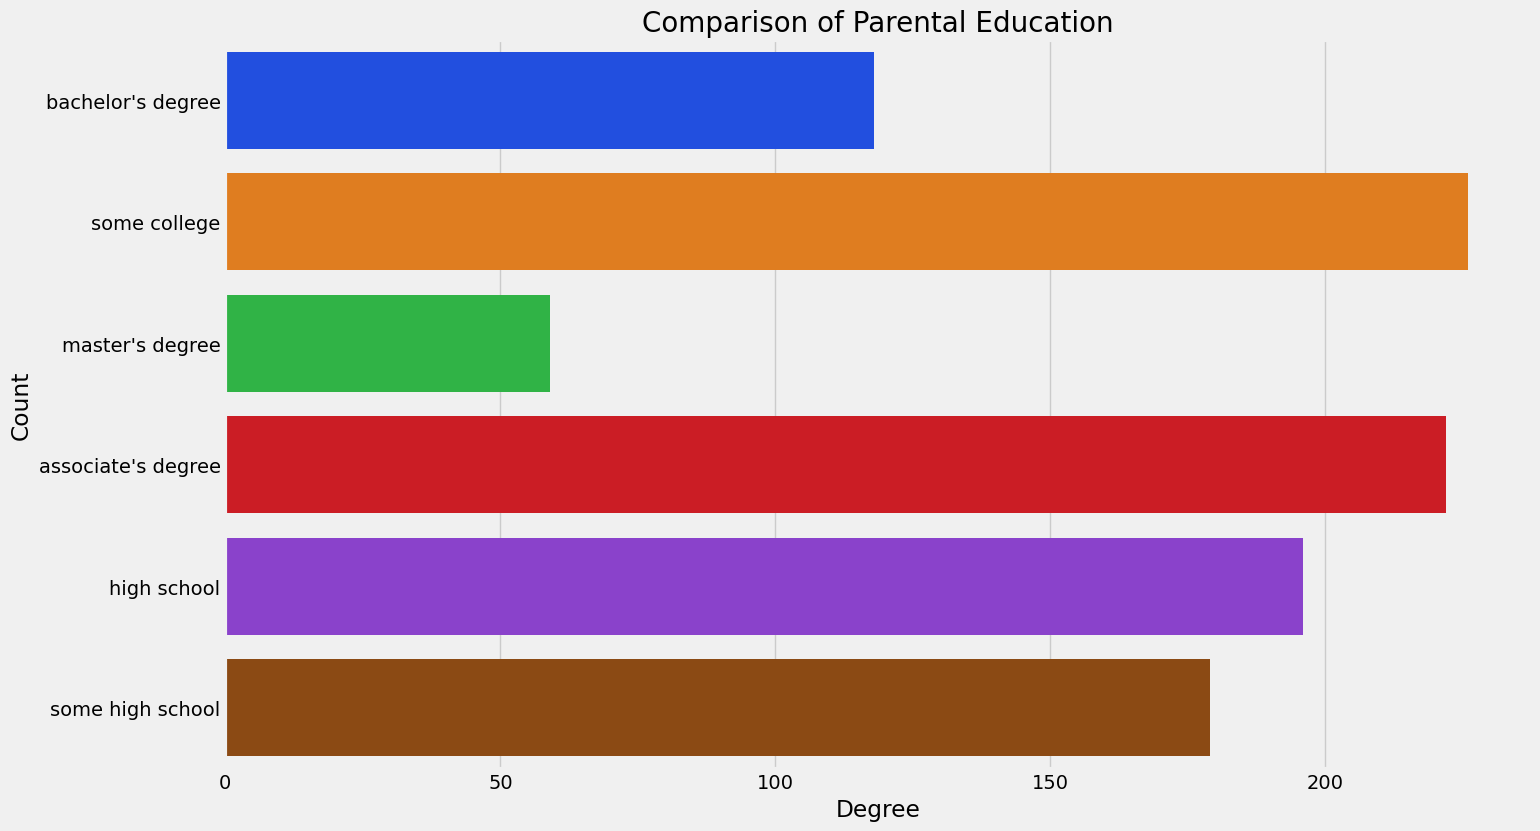

In [50]:
plt.rcParams['figure.figsize']=(15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'bright')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

In [51]:
# Insights:
# largest number of parents are from Some College

# Bivariate analysis (Is parental education has any impact on students's performance?)

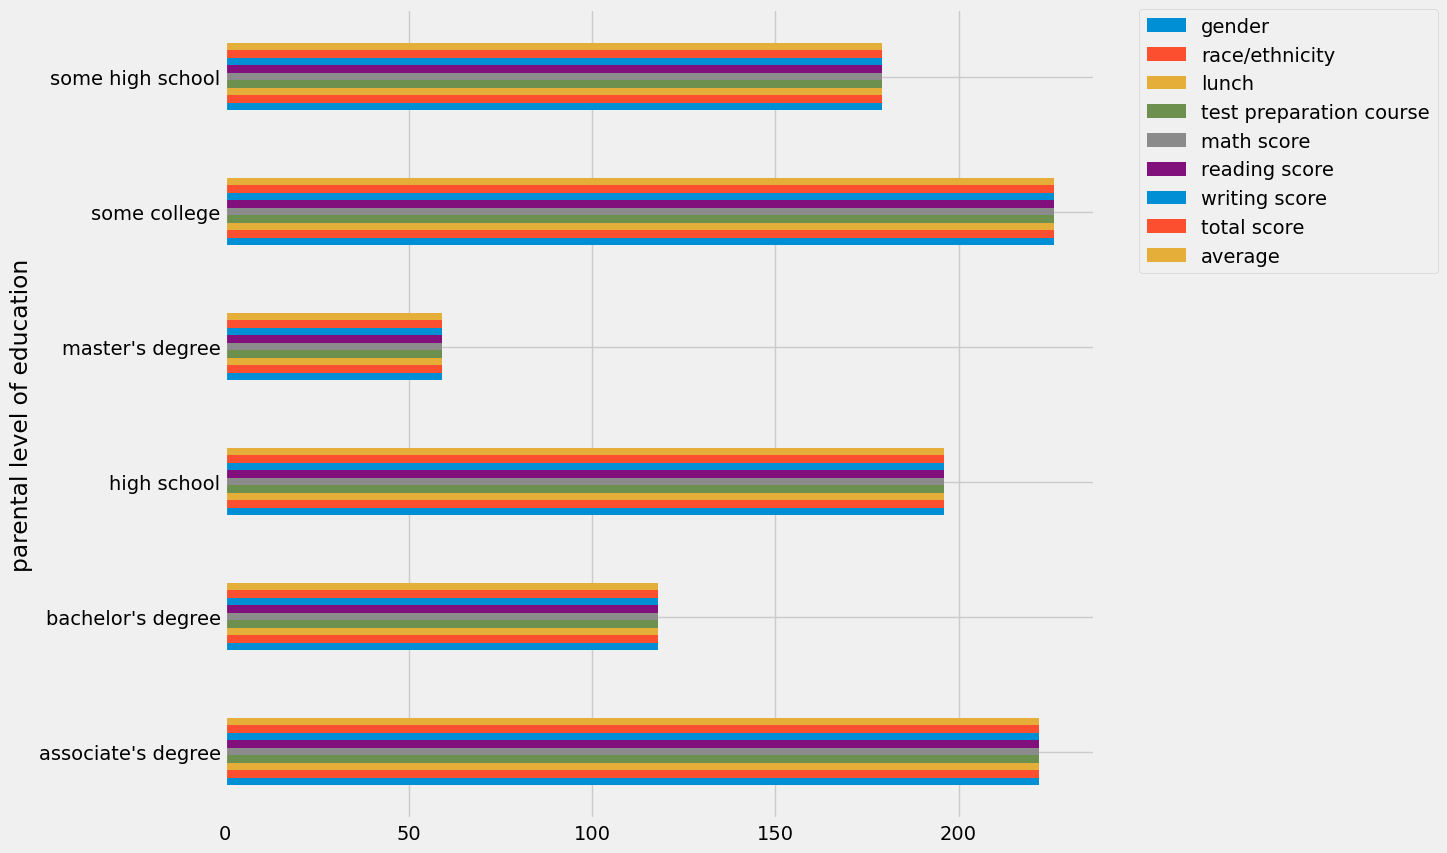

In [59]:
df.groupby('parental level of education').count().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

# Checking Outliers

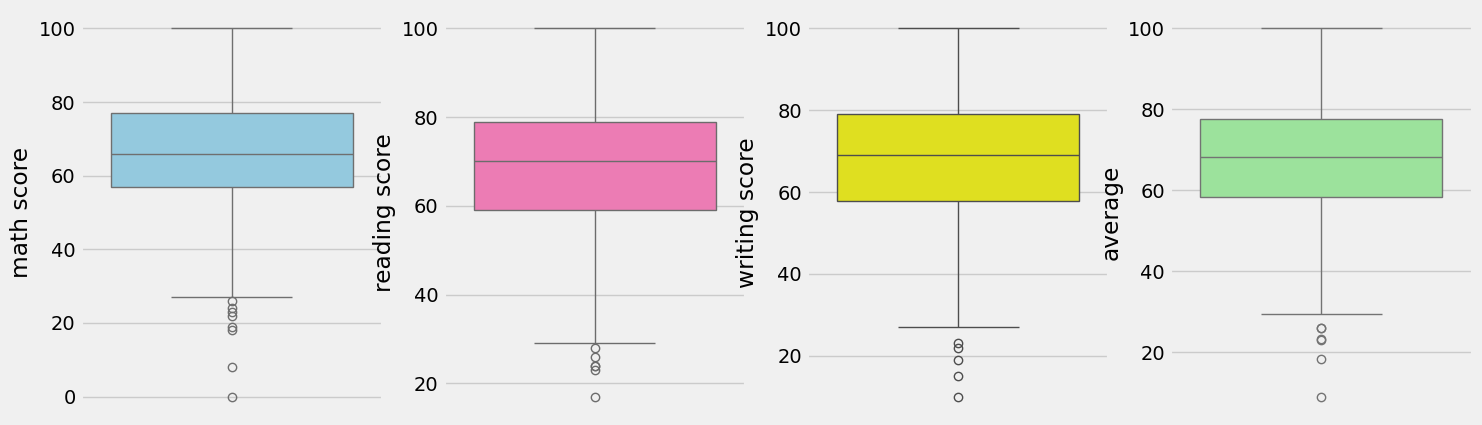

In [60]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()